In [2]:
import numpy as np
import pandas as pd
import math
import scipy.linalg as lin
import matplotlib.pyplot as plt
# Q13-15
# 导入数据函数
def loadData(filename):
    data = pd.read_csv(filename, sep='\s+', header=None)
    data = data.as_matrix()
    col, row = data.shape
    X = np.c_[np.ones((col, 1)), data[:, 0: row-1]]
    Y = data[:, row-1:row]
    return X, Y
# 误差计算函数
def mistake(X, Y, theta):
    yhat = X.dot(theta)
    yhat[yhat > 0] = 1
    yhat[yhat <= 0] = -1
    err = np.sum(yhat != Y)/len(Y)
    return err


In [4]:
# Q13
if __name__ == '__main__':
    X, Y = loadData('data\hw4_train.dat')
    Xtest, Ytest = loadData('data\hw4_test.dat')
    lamda = 10;
    row, col = X.shape
    wreg = lin.pinv( X.T.dot(X)+lamda*np.eye(col) ).dot( X.T.dot(Y) )
    ein = mistake(X, Y, wreg)
    eout =  mistake(Xtest, Ytest, wreg)
    print('Ein: ',ein,'Eout: ',eout)

Ein:  0.05 Eout:  0.045


c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [12]:
#Q14-15
if __name__ == '__main__':
    X, Y = loadData('data\hw4_train.dat')
    Xtest, Ytest = loadData('data\hw4_test.dat')
    row, col = X.shape
    arr = np.arange(-10,3,1); num = len(arr)
    # lamda = 10.0 must be float
    lamda = 10.0**arr  
    ein = np.zeros((num,1))
    eout = np.zeros((num,1))
    for i in range(num):
        wreg = lin.pinv( X.T.dot(X)+lamda[i]*np.eye(col) ).dot( X.T.dot(Y) )
        ein[i] = mistake(X, Y, wreg)
        eout[i] = mistake(Xtest, Ytest, wreg)
    out = np.c_[np.c_[np.array(lamda),ein],eout]
print('  lamda\t   Ein\t    Eout')
print(out)
    

  lamda	   Ein	    Eout
[[1.00e-10 1.50e-02 2.00e-02]
 [1.00e-09 1.50e-02 2.00e-02]
 [1.00e-08 1.50e-02 2.00e-02]
 [1.00e-07 3.00e-02 1.50e-02]
 [1.00e-06 3.50e-02 1.60e-02]
 [1.00e-05 3.00e-02 1.60e-02]
 [1.00e-04 3.00e-02 1.60e-02]
 [1.00e-03 3.00e-02 1.60e-02]
 [1.00e-02 3.00e-02 1.60e-02]
 [1.00e-01 3.50e-02 1.60e-02]
 [1.00e+00 3.50e-02 2.00e-02]
 [1.00e+01 5.00e-02 4.50e-02]
 [1.00e+02 2.40e-01 2.61e-01]]


c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


  lamda	   Ein	    Eval	 Eout
[[1.00000000e-10 8.33333333e-03 1.25000000e-01 4.00000000e-02]
 [1.00000000e-09 0.00000000e+00 1.00000000e-01 3.80000000e-02]
 [1.00000000e-08 0.00000000e+00 5.00000000e-02 2.50000000e-02]
 [1.00000000e-07 3.33333333e-02 3.75000000e-02 2.10000000e-02]
 [1.00000000e-06 3.33333333e-02 3.75000000e-02 2.10000000e-02]
 [1.00000000e-05 3.33333333e-02 3.75000000e-02 2.10000000e-02]
 [1.00000000e-04 3.33333333e-02 3.75000000e-02 2.10000000e-02]
 [1.00000000e-03 3.33333333e-02 3.75000000e-02 2.10000000e-02]
 [1.00000000e-02 3.33333333e-02 3.75000000e-02 2.10000000e-02]
 [1.00000000e-01 3.33333333e-02 3.75000000e-02 2.20000000e-02]
 [1.00000000e+00 3.33333333e-02 3.75000000e-02 2.80000000e-02]
 [1.00000000e+01 7.50000000e-02 1.25000000e-01 8.00000000e-02]
 [1.00000000e+02 3.41666667e-01 4.12500000e-01 4.14000000e-01]]


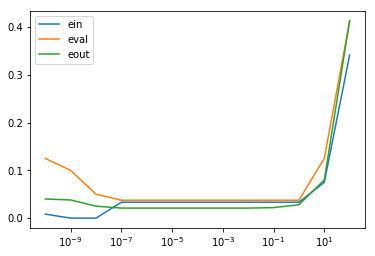

In [25]:
#Q16-17
if __name__ == '__main__':
    X, Y = loadData('data\hw4_train.dat')
    Xtest, Ytest = loadData('data\hw4_test.dat')
    Xtrain = X[0:120,:];Ytrain = Y[0:120,:];
    Xval = X[120:,:];Yval = Y[120:,:];
    row, col = X.shape
    arr = np.arange(-10,3,1); num = len(arr)
    # lamda = 10.0 must be float
    lamda = 10.0**arr  
    ein = np.zeros((num,1))
    eout = np.zeros((num,1))
    evali = np.zeros((num,1))
    for i in range(num):
        wreg = lin.pinv( Xtrain.T.dot(Xtrain)+lamda[i]*np.eye(col) ).dot( Xtrain.T.dot(Ytrain) )
        ein[i] = mistake(Xtrain, Ytrain, wreg)
        eout[i] = mistake(Xtest, Ytest, wreg)
        evali[i] = mistake(Xval, Yval, wreg)
        
    out = np.c_[np.c_[np.c_[np.array(lamda),ein],evali],eout]
    print('  lamda\t   Ein\t    Eval\t Eout')
    print(out)
    plt.plot(lamda, ein, label='ein'); plt.plot(lamda, evali, label='eval'); plt.plot(lamda, eout, label='eout')
    plt.xscale('log')
    plt.legend()
    plt.show()
    


In [26]:
#Q18
if __name__ == '__main__':
    evalimin = np.min(evali)
    print('min eval=',evalimin)
    print( 'np.where',np.where(evali == evalimin) )
    #(3,0)=[0][0],(4,0)=[0][1],[0][-1]= biggest
    lamdamin = lamda[np.where(evali == evalimin)[0][-1]]
    print('min lambda=',lamdamin)
    # find out the best lamda and got it into eout
    wreg = lin.pinv( X.T.dot(X)+lamdamin*np.eye(col) ).dot( X.T.dot(Y) )
    errin = mistake(X, Y, wreg)
    errout =  mistake(Xtest, Ytest, wreg)
    print('final ein=',errin)
    print('final eout=',errout)

min eval= 0.0375
np.where (array([ 3,  4,  5,  6,  7,  8,  9, 10], dtype=int32), array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int32))
min lambda= 1.0
final ein= 0.035
final eout= 0.02


In [34]:
import numpy as np
a = np.array([[1,2],
              [3,4],
              [0,0]])
b = np.array([[5,6],
              [7,8]])
c = np.r_[a,b]
c


array([[1, 2],
       [3, 4],
       [0, 0],
       [5, 6],
       [7, 8]])